In [1]:
from pybn.fuzzy_network import FuzzyBooleanNetwork
from pybn.graphs import create_uniform_graph
from pybn.plots import box_plot
import pybn.execution as execution
import numpy as np

In [2]:
configuration = execution.new_configuration()

In [3]:
configuration = {
        'network': {'class': FuzzyBooleanNetwork, 'nodes': 16, 'basis': 3, 'bias': 0.5, 'seed': None},
        'fuzzy': {'conjunction': lambda x,y : min(x,y), 'disjunction': lambda x,y : max(x,y), 'negation': lambda x : 1 - x},
        'graph': {'function': create_uniform_graph, 'k_start': 0, 'k_end': 8, 'k_step': 0.5, 'seed': None},
        'execution': {'networks': 10, 'runs': 10, 'steps': 100, 'transient': 0, 'jobs': 8},
        'storage_path' : '/home/nogar/Documents/Exp'}

In [4]:
execution.parallel_execution(configuration)

100%|██████████| 16/16 [00:05<00:00,  2.77it/s]


In [5]:
n = 128
k = 5
b = 16

In [6]:
graph = create_uniform_graph(n, k)

In [7]:
fuzzynet = FuzzyBooleanNetwork(n, b, graph)

In [8]:
data_list = []
for _ in range(4):
    data = np.zeros((128,129))
    fuzzynet.set_initial_state()
    data[:,0] = fuzzynet.state
    for i in range(128):
        fuzzynet.step()
    for i in range(128):
        fuzzynet.step()
        data[:,i+1] = fuzzynet.state
    data_list.append(data)

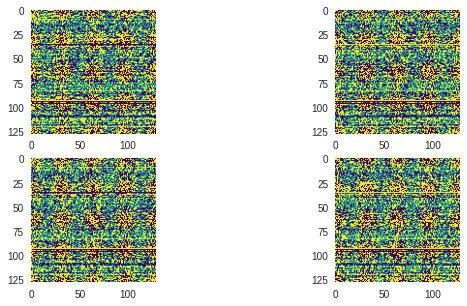

In [9]:
box_plot(data_list, fig_size=(10,5))